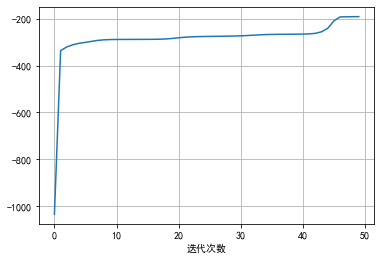

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
 
iris = datasets.load_iris()
X = iris.data
N, D = X.shape
 
mus = X[np.random.choice(X.shape[0], 3, replace=False)]
covs = [np.identity(4) for i in range(3)]
pis = [1/3] * 3
 
def gaussian(X, mu, cov):
    diff = X - mu
    return 1 / ((2 * np.pi) ** (D / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff, np.linalg.inv(cov)), diff))
 
def get_likelihood(gamma_total):
    return np.log(gamma_total).sum()
 
def train_step(X, mus, covs, pis):
    gammas = []
    for mu_, cov_, pi_ in zip(mus, covs, pis):# loop each center
        gamma_ = [[pi_ * gaussian(x_, mu_, cov_)] for x_ in X]# loop each point
        gammas.append(gamma_)
    gammas = np.array(gammas)
    gamma_total = gammas.sum(0)
    gammas /= gamma_total
    
    mus, covs, pis = [], [], []
    for gamma_ in gammas:#loop each center
        gamma_sum = gamma_.sum()
        pi_ = gamma_sum / N
        mu_ = (gamma_ * X).sum(0) / gamma_sum
        cov_ = []
        for x_, gamma_i in zip(X, gamma_):
            diff = (x_ - mu_).reshape(-1, 1)
            cov_.append(gamma_i * np.dot(diff, diff.T))
        cov_ = np.sum(cov_, axis=0) / gamma_sum
        pis.append(pi_)
        mus.append(mu_)
        covs.append(cov_)
    return mus, covs, pis, gamma_total
    
log_LL = []
for _ in range(50):
    mus, covs, pis, gamma_total = train_step(X, mus, covs, pis)
    log_LL.append(get_likelihood(gamma_total))
plt.plot(log_LL)
plt.xlabel('迭代次数')
plt.grid()
plt.savefig('../../期末作业/figures/GMM_loss.png', dpi=900)